In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

# Load Dataset
df = pd.read_csv("/Users/tanishchaudhari/Desktop/ML PROJECT 5TH SEM/Crop_recommendationV2.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture,soil_type,...,organic_matter,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,29.446064,2,...,3.121395,4,11.743910,57.607308,188.194958,1,2.719614,3,95.649985,1.193293
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,12.851183,3,...,2.142021,4,16.797101,74.736879,70.963629,1,4.714427,2,77.265694,1.752672
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,29.363913,2,...,1.474974,1,12.654395,1.034478,191.976077,1,30.431736,2,18.192168,3.035541
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,26.207732,3,...,8.393907,1,10.864360,24.091888,55.761388,3,10.861071,3,82.818720,1.273341
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,28.236236,2,...,5.202285,3,13.852910,38.811481,185.259702,2,47.190777,3,25.466499,2.578671


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   N                       2200 non-null   int64  
 1   P                       2200 non-null   int64  
 2   K                       2200 non-null   int64  
 3   temperature             2200 non-null   float64
 4   humidity                2200 non-null   float64
 5   ph                      2200 non-null   float64
 6   rainfall                2200 non-null   float64
 7   label                   2200 non-null   object 
 8   soil_moisture           2200 non-null   float64
 9   soil_type               2200 non-null   int64  
 10  sunlight_exposure       2200 non-null   float64
 11  wind_speed              2200 non-null   float64
 12  co2_concentration       2200 non-null   float64
 13  organic_matter          2200 non-null   float64
 14  irrigation_frequency    2200 non-null   

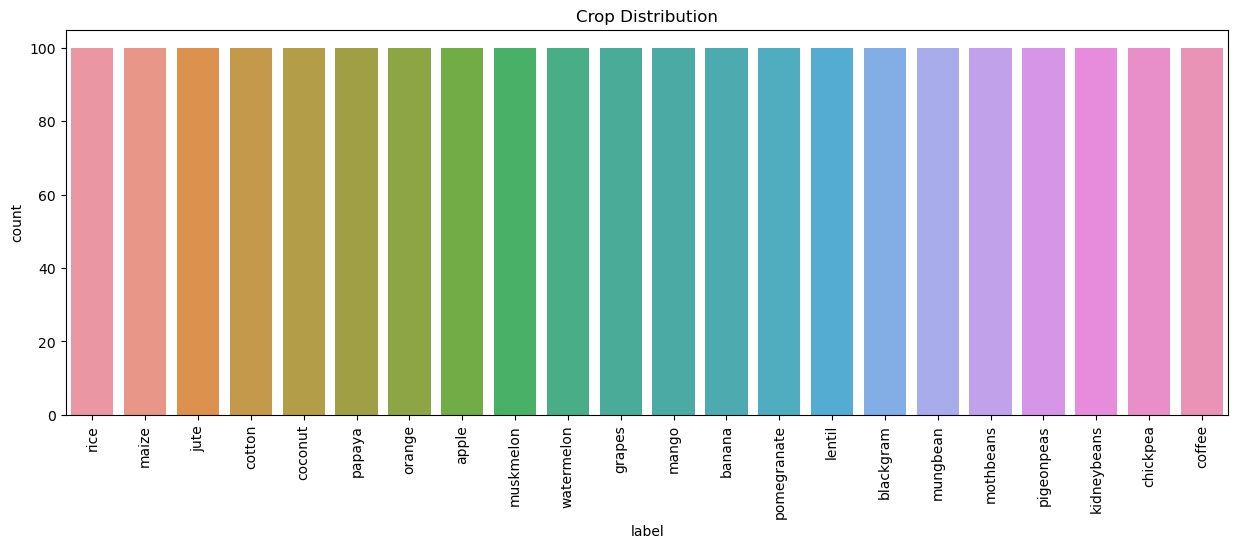

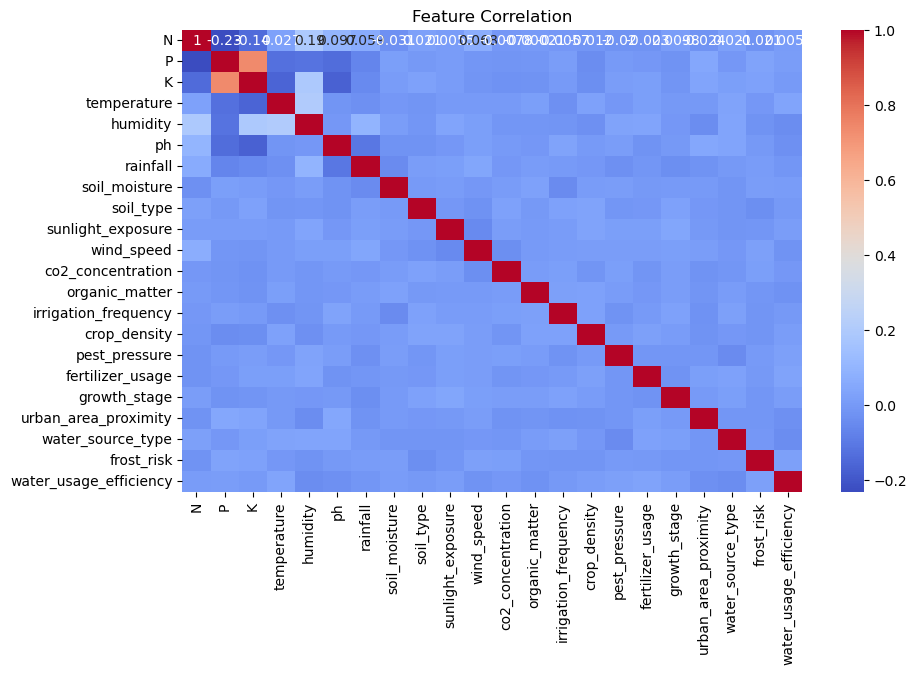

In [2]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

plt.figure(figsize=(15,5))
order = df['label'].value_counts().index
sns.countplot(x="label", data=df, order=order)
plt.xticks(rotation=90)
plt.title("Crop Distribution")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns=["label"]).corr(method="pearson"), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop("label", axis=1)
y = df["label"]


le = LabelEncoder()
y = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("✅ Preprocessing Done!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\nUnique Crop Classes:", len(le.classes_))
print("Example Encoded Labels:", y[:10])

✅ Preprocessing Done!
X_train shape: (1760, 22)
X_test shape: (440, 22)
y_train shape: (1760,)
y_test shape: (440,)

Unique Crop Classes: 22
Example Encoded Labels: [20 20 20 20 20 20 20 20 20 20]


In [4]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'



LogReg Performance:
Accuracy: 0.9522727272727273
F1 Score: 0.9525055500055499
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.90      0.90      0.90        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.89      1.00      0.94        17
           7       1.00      1.00      1.00        14
           8       0.87      0.87      0.87        23
           9       0.91      1.00      0.95        20
          10       0.71      0.91      0.80        11
          11       1.00      0.90      0.95        21
          12       0.90      1.00      0.95        19
          13       0.95      0.83      0.89        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
  

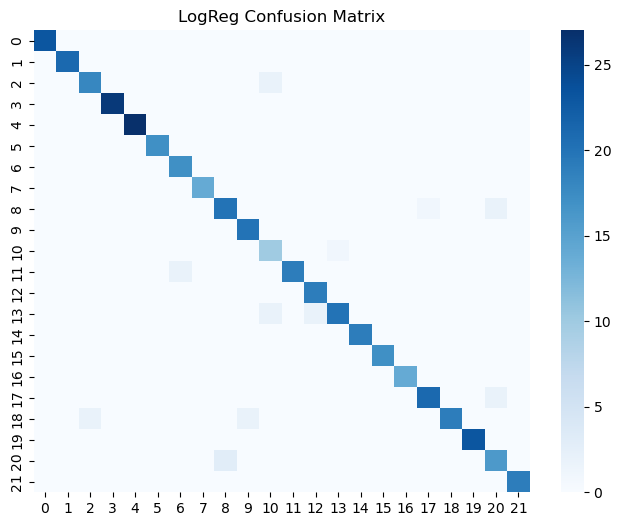


RandomForest Performance:
Accuracy: 0.9886363636363636
F1 Score: 0.9887073396035007
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      0.96      0.94        23
           9       1.00      1.00      1.00        20
          10       0.85      1.00      0.92        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00       

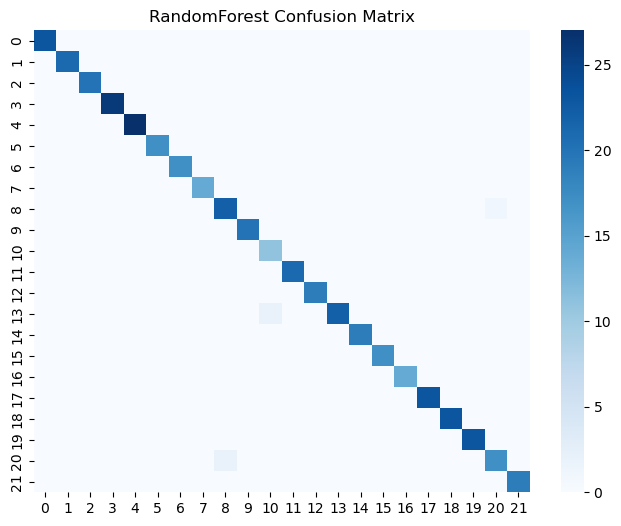


XGBoost Performance:
Accuracy: 0.9863636363636363
F1 Score: 0.986347164805032
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.96      0.96      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
  

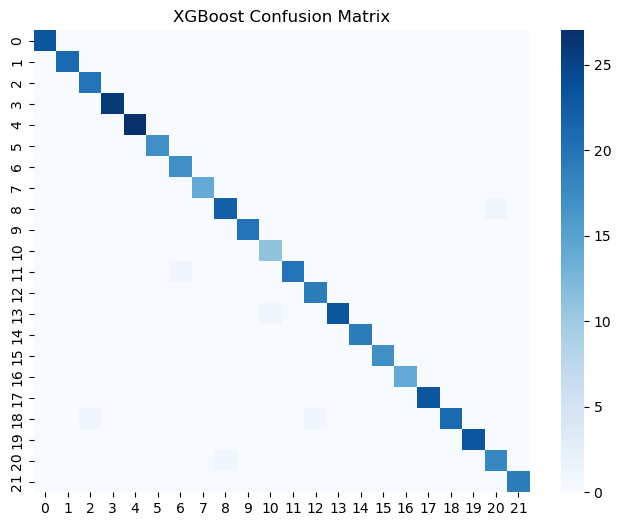

In [5]:

models = {"LogReg": log_reg, "RandomForest": rf, "XGBoost": xgb_clf}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_test, y_pred), cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.show()


In [6]:
crop_conditions = {
    "rice": {"N": 90, "P": 40, "K": 40},
    "wheat": {"N": 120, "P": 50, "K": 60},
    "maize": {"N": 100, "P": 45, "K": 50},
    "cotton": {"N": 110, "P": 55, "K": 65}
}

def suggest_fertilizer(crop, N, P, K):
    if crop not in crop_conditions:
        return [f"No data available for {crop}"]

    ideal = crop_conditions[crop]
    suggestions = []

    if N < ideal["N"]:
        suggestions.append("Add Nitrogen (Urea)")
    if P < ideal["P"]:
        suggestions.append("Add Phosphorus (DAP)")
    if K < ideal["K"]:
        suggestions.append("Add Potassium (MOP)")

    return suggestions if suggestions else ["Soil nutrients are balanced!"]

print("For Rice with N=40, P=20, K=20 →", suggest_fertilizer("rice", 40, 20, 20))
print("For Wheat with N=130, P=60, K=70 →", suggest_fertilizer("wheat", 130, 60, 70))

For Rice with N=40, P=20, K=20 → ['Add Nitrogen (Urea)', 'Add Phosphorus (DAP)', 'Add Potassium (MOP)']
For Wheat with N=130, P=60, K=70 → ['Soil nutrients are balanced!']


In [7]:
crop_conditions = df.groupby("label").mean()
print(crop_conditions)

# Example: Ideal conditions for Rice
print("\nIdeal conditions for Rice:\n", crop_conditions.loc["rice"])


                  N       P       K  temperature   humidity        ph  \
label                                                                   
apple         20.80  134.22  199.89    22.630942  92.333383  5.929663   
banana       100.23   82.01   50.05    27.376798  80.358123  5.983893   
blackgram     40.02   67.47   19.24    29.973340  65.118426  7.133952   
chickpea      40.09   67.79   79.92    18.872847  16.860439  7.336957   
coconut       21.98   16.93   30.59    27.409892  94.844272  5.976562   
coffee       101.20   28.74   29.94    25.540477  58.869846  6.790308   
cotton       117.77   46.24   19.56    23.988958  79.843474  6.912675   
grapes        23.18  132.53  200.11    23.849575  81.875228  6.025937   
jute          78.40   46.86   39.99    24.958376  79.639864  6.732778   
kidneybeans   20.75   67.54   20.05    20.115085  21.605357  5.749411   
lentil        18.77   68.36   19.41    24.509052  64.804785  6.927932   
maize         77.76   48.44   19.79    22.389204  6

In [8]:
!pip install shap

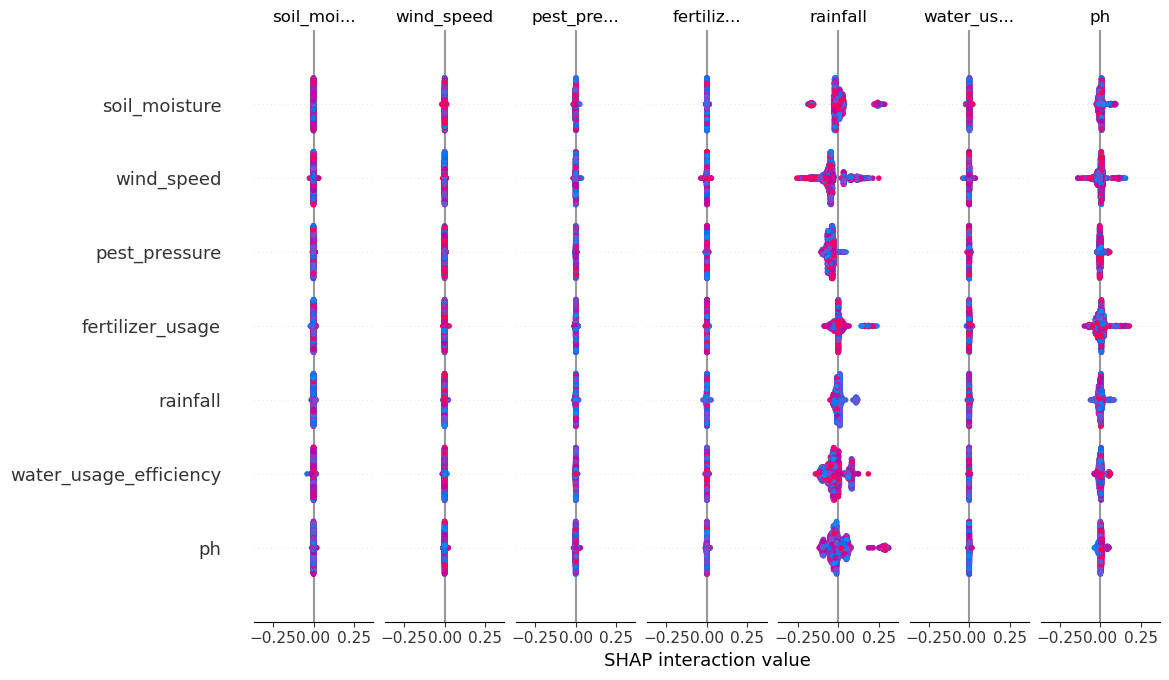

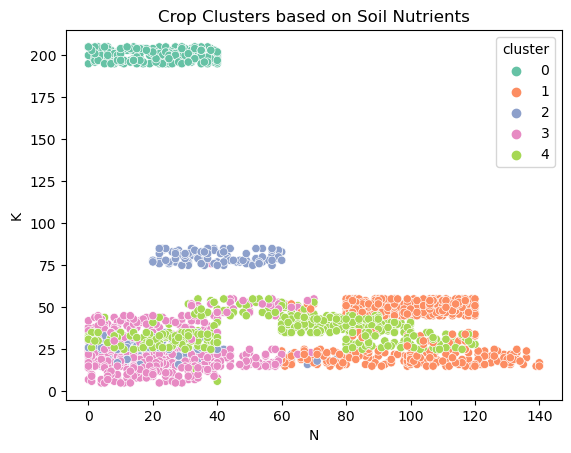

['Add Nitrogen (Urea)', 'Add Phosphorus (DAP)', 'Add Potassium (MOP)']


In [9]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, feature_names=X.columns)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df["cluster"] = clusters

sns.scatterplot(x=df["N"], y=df["K"], hue=df["cluster"], palette="Set2")
plt.title("Crop Clusters based on Soil Nutrients")
plt.show()

def suggest_fertilizer(crop, N, P, K):
    ideal = crop_conditions.loc[crop]
    suggestions = []
    if N < ideal["N"]:
        suggestions.append("Add Nitrogen (Urea)")
    if P < ideal["P"]:
        suggestions.append("Add Phosphorus (DAP)")
    if K < ideal["K"]:
        suggestions.append("Add Potassium (MOP)")
    return suggestions if suggestions else ["Soil nutrients are balanced!"]

print(suggest_fertilizer("rice", 40, 20, 20))
